In [38]:
import numpy as np
import pandas as pd
import copy, math
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline

This model will make use of the 'Housing.csv' which is also provided with notebook. As this will be going over Single-Variable Gradient Descent, there are far too many features so we will reduce that number down to just to one feature for the X_train, which we will choose to be 'area', and we will set the y_train to be the 'price'.

In [ ]:
# Read in the dataset
dataset = pd.read_csv('Housing.csv')

dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [93]:
# Convert the data into X and y trains using numpy 

y_train = np.array(dataset['price'])
X_train = np.array(dataset['area'])

In order to present a clean and plot and good feature scaling, we must both lower the presented y_train value and normalize X_train so that we attain a much smaller range. 

We can lower the y_train values by dividing the price by 10,000 then plotting the values as 'Housing Prices in $10,000's'. For the X_train values, we can use z-score normalization.

In [89]:
# Lower the displayed housing prices to display housing prices in thousands
# Implement Z-score to normalize the feature 'area'

y_train = y_train / 10000

def zscore_normalize_features(X):
    # find the mean of each column/feature
    mu = np.mean(X, axis=0)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)
    # subtract mu for that column from each example, divide by std
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

We can now see how the datapoints are plotted with the changes that we have made.

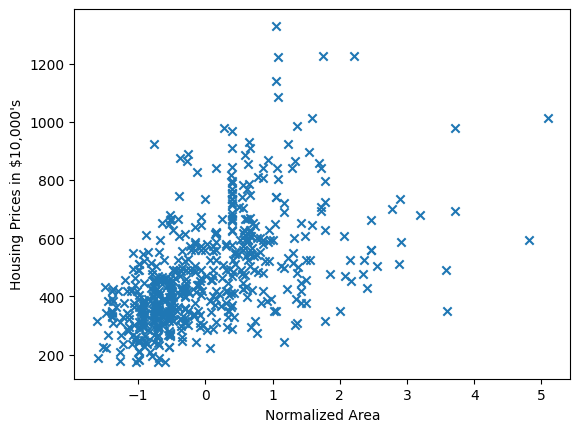

In [90]:
# Plot the data using X_norm
X_norm, mu, sigma = zscore_normalize_features(X_train)

plt.figure
plt.scatter(X_norm, y_train, marker='x')
plt.xlabel('Normalized Area')
plt.ylabel('Housing Prices in $10,000\'s')
plt.show()

This is the Cost Function. This is one of the major steps behind Gradient Descent. The idea behind the cost function is that is sees how the model's prediction compares to the actual values that are provided. 

In [91]:
def compute_cost(x, y, w, b):
    total_cost = 0
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = (w * x[i]) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    total_cost = (1 * (2 / m)) * cost_sum

    return total_cost

This is the Compute_Gradient Function. The entire goal behind this function is to calculate dj_dw and dj_db. 

Put in the simplest way, dj_dw and dj_db are the derivatives of the Cost Function with resepct to each parameter in the model.

In [92]:
def compute_gradient(x, y, w, b):

    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = (w * x[i]) + b
        dj_db_i = (f_wb - y[i])
        dj_dw_i = (f_wb - y[i]) * x[i]

        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db

In [45]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:   
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history


In [ ]:
initial_w = 0.
initial_b = 0.

iterations = 5000
alpha = 0.001

w,b,_,_ = gradient_descent(X_norm, y_train, initial_w, initial_b,
                           compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 523328.13   
Iteration 5000: Cost 49798.62   
Iteration 10000: Cost 49777.23   
Iteration 15000: Cost 49777.23   
Iteration 20000: Cost 49777.23   
Iteration 25000: Cost 49777.23   
Iteration 30000: Cost 49777.23   
Iteration 35000: Cost 49777.23   
Iteration 40000: Cost 49777.23   
Iteration 45000: Cost 49777.23   
w,b found by gradient descent: 100.16304758731641 476.6729247706138


In [61]:
m = X_norm.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_norm[i] + b

Text(0.5, 0, 'Area of house')

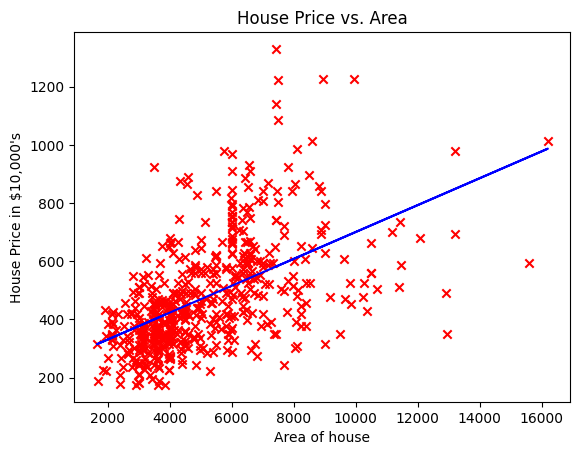

In [ ]:
# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("House Price vs. Area")
# Set the y-axis label
plt.ylabel('House Price in $10,000\'s')
# Set the x-axis label
plt.xlabel('Area of house (in sqft)')

In [ ]:
# Modify the area to see the predicted price for a house with area 'x'

area = 15000.0
area_norm = (area - mu) / sigma
prediction = (w * area_norm) + b
print(f'For an area of {area}, the predicted house price is: ${prediction * 1000:0.0f}')

4.542795729947047
For an area of 15000.0, the predicted house price is: $931693


The results displayed from running the prediction may not be the most accuarate, but it does give us an average of what the true house price should be using the area as its ratio.

The biggest visible problem with this model, are the 'one-off' values at the very right of the plot for the area, and at the very top of the plot. The model will not grant an accurate average price in those areas due to the 'Linear Regression' model not being a good fit. A better model, albeit by not much, would be to use would be 'Polynomial Regression'. 